In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker

In [2]:
data = pd.read_csv('../data/superstore.csv')

In [3]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
data.drop('Row ID',axis = 1, inplace = True) 
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y') 
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y')   

In [7]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Order Date,9800,2017-05-01 05:13:51.673469440,2015-01-03 00:00:00,2016-05-24 00:00:00,2017-06-26 00:00:00,2018-05-15 00:00:00,2018-12-30 00:00:00,NaN
Ship Date,9800,2017-05-05 04:17:52.653061120,2015-01-07 00:00:00,2016-05-27 18:00:00,2017-06-29 00:00:00,2018-05-19 00:00:00,2019-01-05 00:00:00,NaN
Postal Code,9789.0,55273.322403,1040.0,23223.0,58103.0,90008.0,99301.0,32041.223413
Sales,9800.0,230.769059,0.444,17.248,54.49,210.605,22638.48,626.651875


In [8]:
data.sort_values(by='Order Date', inplace=True)
data.set_index('Order Date', inplace=True)

In [9]:
print(data.isnull().sum())

Order ID          0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [10]:
data.nunique()

Order ID         4922
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [11]:
data[data['Postal Code'].isnull()][['Country', 'State', 'City', 'Region']]

,Country,State,City,Region
Order Date,,,,
2016-11-07,United States,Vermont,Burlington,East
2016-11-08,United States,Vermont,Burlington,East
2017-01-23,United States,Vermont,Burlington,East
2017-01-23,United States,Vermont,Burlington,East
2017-01-23,United States,Vermont,Burlington,East
2017-04-06,United States,Vermont,Burlington,East
2018-01-19,United States,Vermont,Burlington,East
2018-01-19,United States,Vermont,Burlington,East
2018-01-19,United States,Vermont,Burlington,East


In [12]:
data['Postal Code'].fillna(5401, inplace=True)  

/var/folders/3q/rggp33rx7374d1rnpz_q80nw0000gn/T/ipykernel_46902/404768243.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Postal Code'].fillna(5401, inplace=True)


In [13]:
print(data.isnull().sum())
print('-' * 30)
print(data['Postal Code'].nunique())

Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64
------------------------------
627


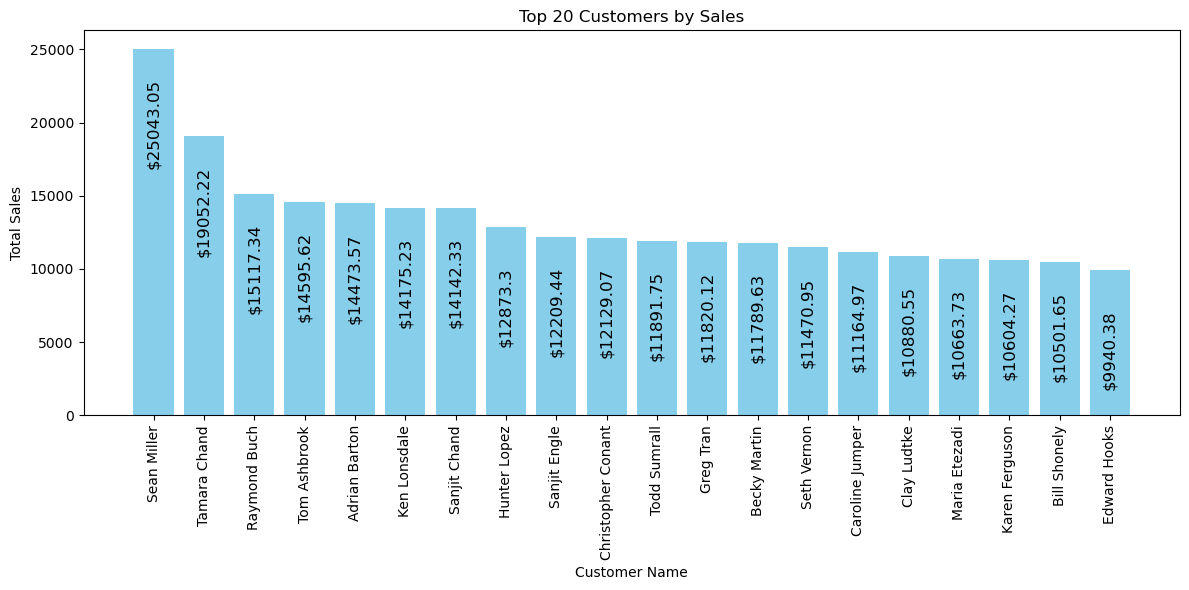

In [14]:
top_customers = data.groupby(['Customer Name'])['Sales'].sum().sort_values(ascending=False).head(20).reset_index().round(2)

plt.figure(figsize=(12, 6))
plt.title('Top 20 Customers by Sales')
plt.bar(top_customers['Customer Name'], top_customers['Sales'].round(2), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
for k,v in top_customers["Sales"].items():
    plt.text(k,v-8000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
plt.tight_layout()
plt.show()

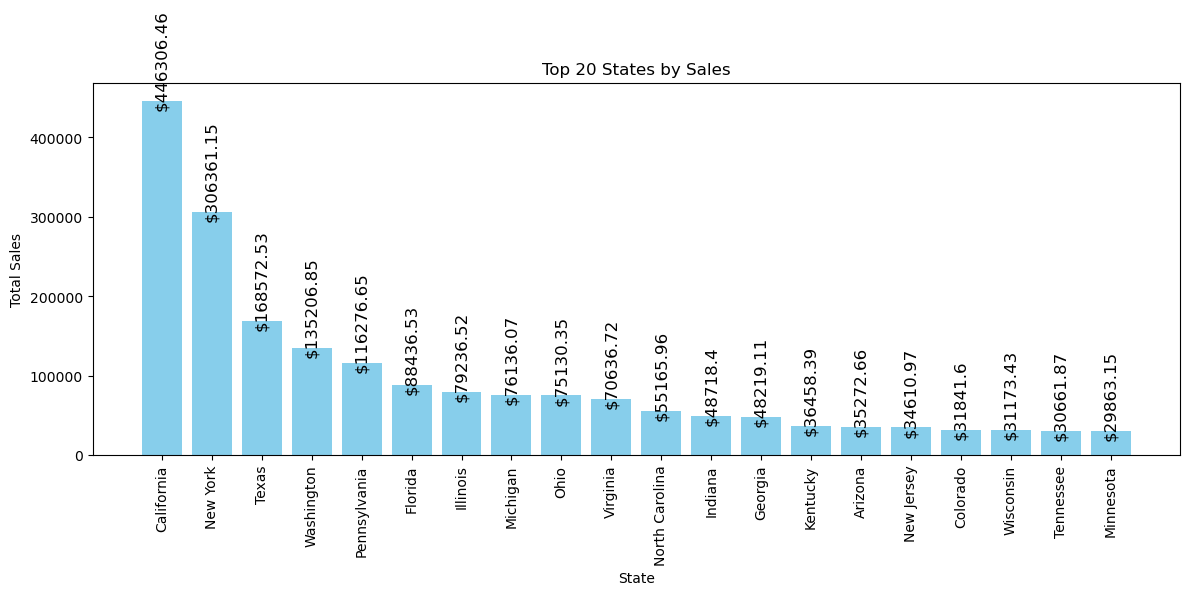

In [15]:
top_states = data.groupby(['State'])['Sales'].sum().sort_values(ascending=False).head(20).reset_index().round(2)

plt.figure(figsize=(12, 6))
plt.title('Top 20 States by Sales')
plt.bar(top_states['State'], top_states['Sales'].round(2), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Sales')
for k,v in top_states["Sales"].items():
    plt.text(k,v-8000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
plt.tight_layout()
plt.show()

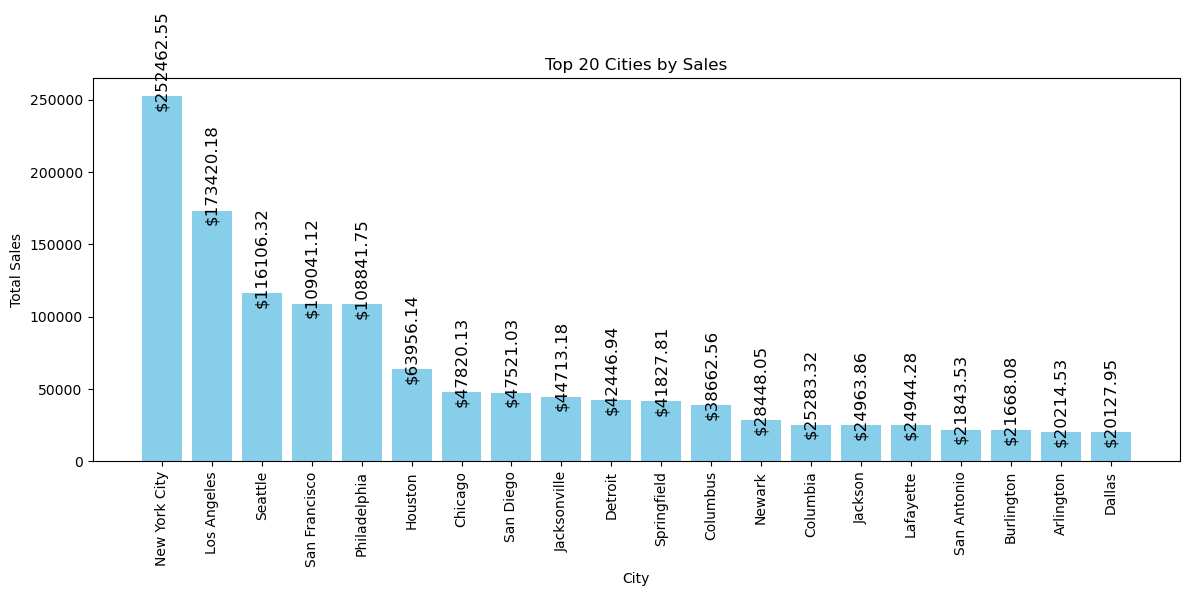

In [16]:
top_cities = data.groupby(['City'])['Sales'].sum().sort_values(ascending=False).head(20).reset_index().round(2)

plt.figure(figsize=(12, 6))
plt.title('Top 20 Cities by Sales')
plt.bar(top_cities['City'], top_cities['Sales'].round(2), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Total Sales')
for k,v in top_cities["Sales"].items():
    plt.text(k,v-8000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
plt.tight_layout()
plt.show()

(-1.0999977496203153,
 1.0999993965994836,
 -1.099998466788061,
 1.0999999269899077)

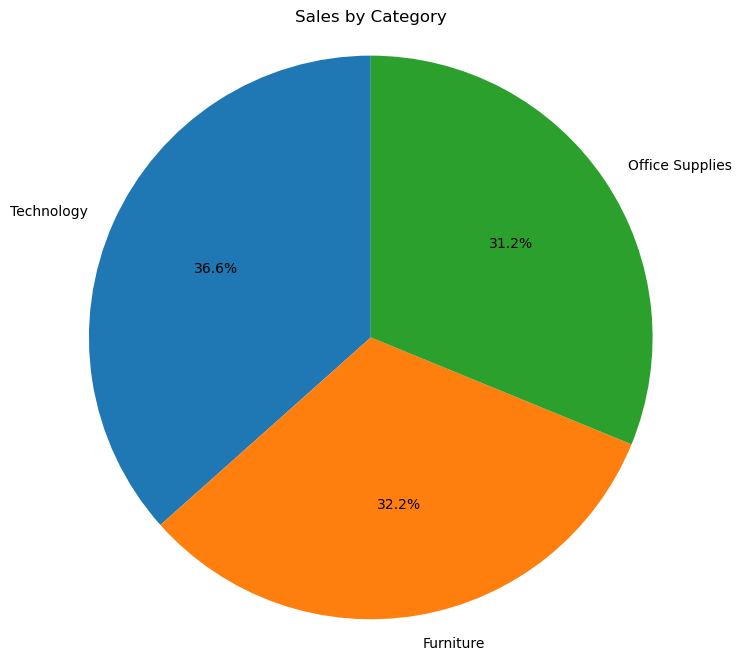

In [17]:
top_categories = data.groupby(['Category'])['Sales'].sum().sort_values(ascending=False).head(20).reset_index().round(2)

plt.figure(figsize=(8, 8))
plt.title('Sales by Category')
plt.pie(
    top_categories['Sales'],
    labels=top_categories['Category'],
    autopct='%1.1f%%',  
    startangle=90
)
plt.axis('equal')  

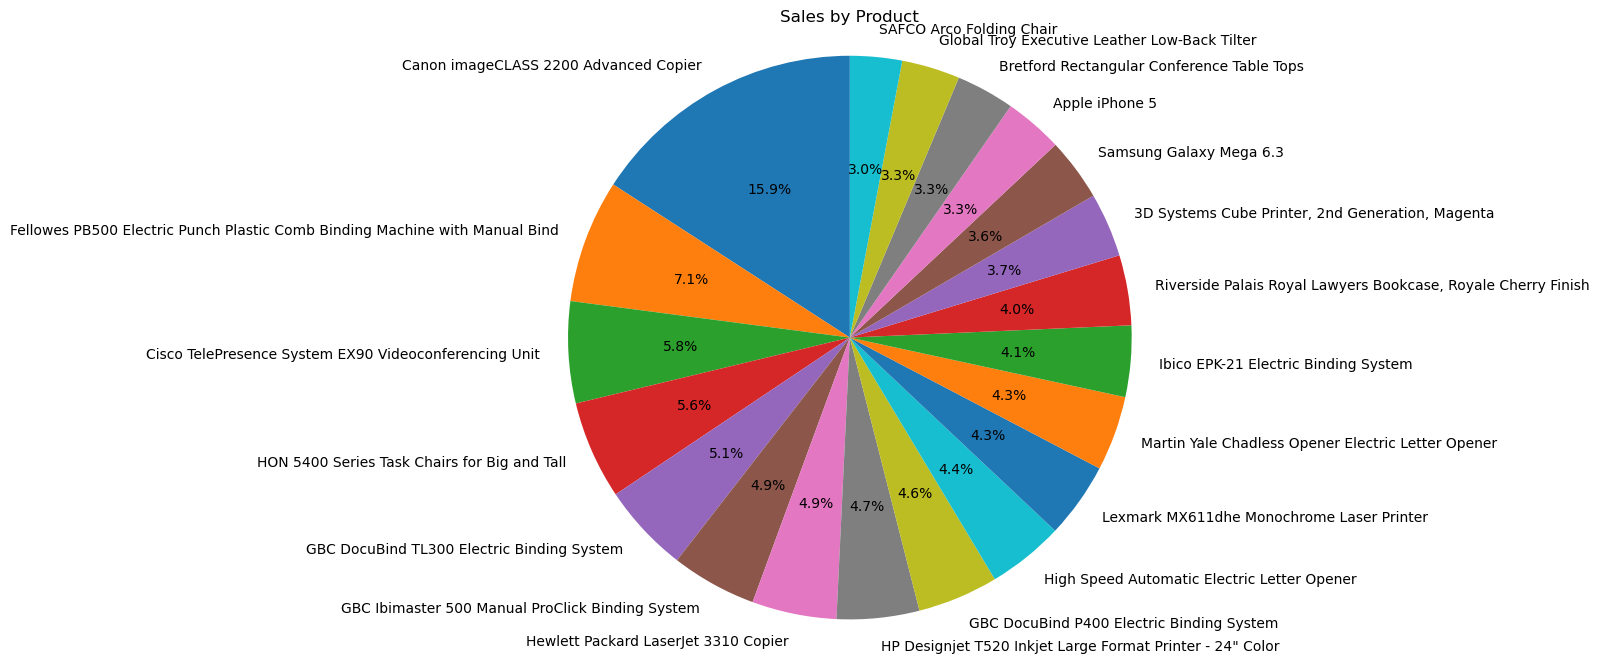

In [18]:
top_products = data.groupby(['Product Name'])['Sales'].sum().sort_values(ascending=False).head(20).reset_index().round(2)

plt.figure(figsize=(8, 8))
plt.title('Sales by Product')
plt.pie(
    top_products['Sales'], 
    labels=top_products['Product Name'], 
    autopct='%1.1f%%',
    startangle=90
)
plt.axis('equal')
plt.show()

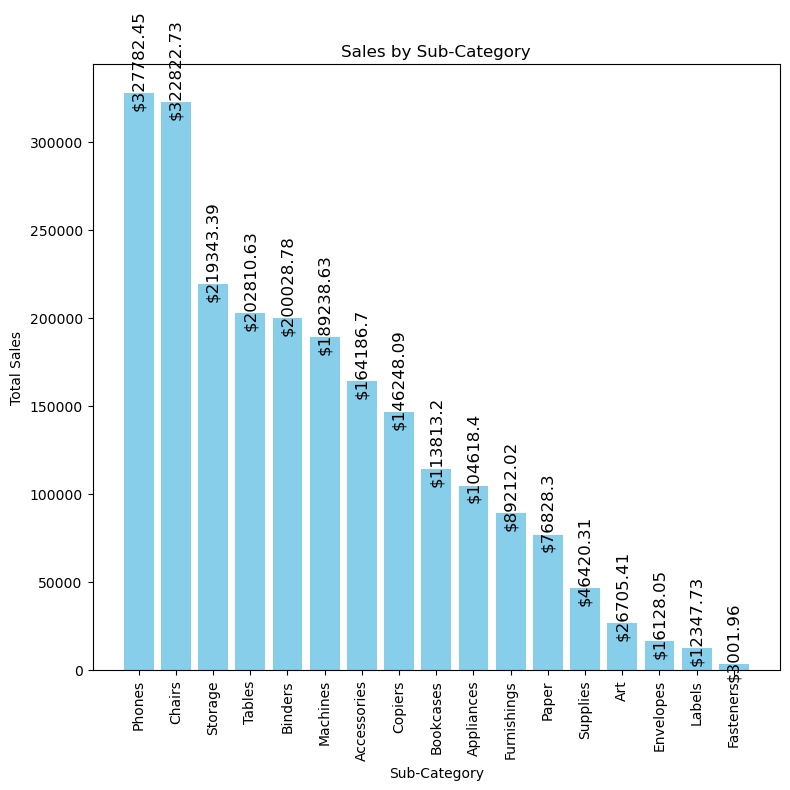

In [26]:
top_subcategories = data.groupby(['Sub-Category','Category'])['Sales'].sum().sort_values(ascending=False).head(20).reset_index().round(2)

plt.figure(figsize=(8, 8))
plt.title('Sales by Sub-Category')
plt.bar(top_subcategories['Sub-Category'], top_subcategories['Sales'].round(2), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
for k,v in top_subcategories["Sales"].items():
    plt.text(k,v-8000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
plt.tight_layout()
plt.show()

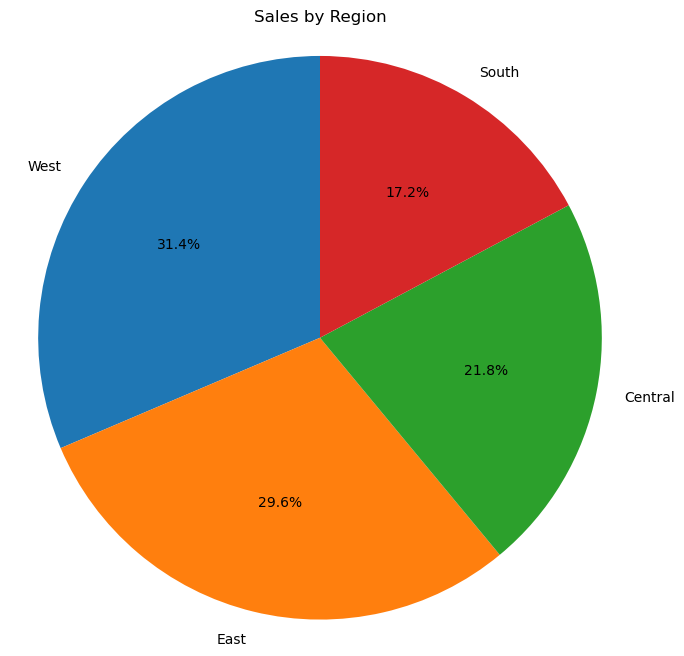

In [39]:
top_regions = data.groupby(['Region'])['Sales'].sum().sort_values(ascending=False).head(20).reset_index().round(2)

plt.figure(figsize=(8, 8))
plt.title('Sales by Region')
plt.pie(
    top_regions['Sales'], 
    labels=top_regions['Region'],
    autopct='%1.1f%%',
    startangle=90
)
plt.axis('equal')
plt.show()

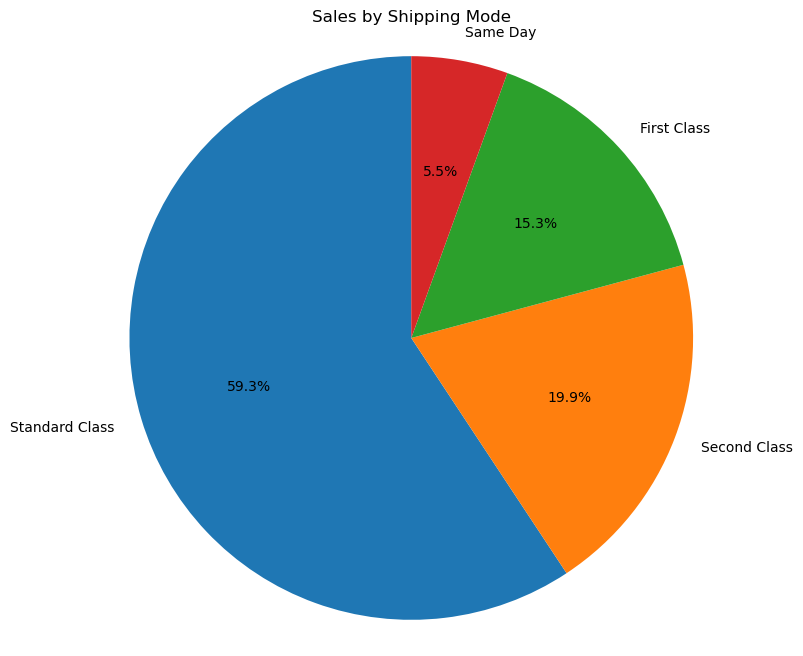

In [41]:
top_spipping_modes = data.groupby(['Ship Mode'])['Sales'].sum().sort_values(ascending=False).head(20).reset_index().round(2)

plt.figure(figsize=(8, 8))
plt.title('Sales by Shipping Mode')
plt.pie(
    top_spipping_modes['Sales'], 
    labels=top_spipping_modes['Ship Mode'],
    autopct='%1.1f%%',
    startangle=90
)
plt.axis('equal')
plt.show()